# 1.) Import the US Perminent Visas using zip extractor

In [82]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [161]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [162]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/Machine Learning Lab/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

Exception ignored in: <function ZipFile.__del__ at 0x7f28d68ef700>
Traceback (most recent call last):
  File "/usr/lib/python3.8/zipfile.py", line 1821, in __del__
  File "/usr/lib/python3.8/zipfile.py", line 1843, in close
  File "/usr/lib/python3.8/zipfile.py", line 1953, in _fpclose
OSError: [Errno 107] Transport endpoint is not connected
/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)

# 2.) Choose 4 features you think are important. Case_status is your target variable


In [164]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [165]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [166]:
testna = df.isna().sum().reset_index()
testna.sort_values(by=[0]).head(20)

,index,0
12,decision_date,0
8,case_status,0
18,employer_name,12
15,employer_city,14
22,employer_postal_code,37
13,employer_address_1,42
23,employer_state,42
76,job_info_work_city,102
78,job_info_work_state,103
97,pw_soc_code,397


In [167]:
df.wage_offer_from_9089

0            75629.0
1            37024.0
2            47923.0
3              10.97
4           100000.0
             ...    
374357     28,330.00
374358    122,000.00
374359     79,082.00
374360     37,981.00
374361     84,926.00
Name: wage_offer_from_9089, Length: 374362, dtype: object

In [168]:
df_select = df[["case_status", "class_of_admission", "job_info_work_state", "wage_offer_from_9089", "job_info_experience_num_months"]]

# 3.) Clean your data for a decision tree


In [169]:
df_select.class_of_admission.unique()

array(['J-1', 'B-2', 'H-1B', 'L-1', 'EWI', 'E-2', nan, 'E-1', 'H-2B',
       'TPS', 'F-1', 'B-1', 'C-1', 'Not in USA', 'TN', 'H-4', 'O-1',
       'R-1', 'L-2', 'Q', 'F-2', 'H-1B1', 'Parolee', 'G-5', 'E-3', 'H-2A',
       'VWT', 'P-1', 'A1/A2', 'D-1', 'A-3', 'R-2', 'H-1C', 'H-3', 'J-2',
       'P-4', 'I', 'H-1A', 'G-1', 'VWB', 'G-4', 'P-3', 'AOS/H-1B', 'O-3',
       'Parol', 'O-2', 'H1B', 'N', 'T-1', 'TD', 'M-1', 'K-1', 'U-1',
       'AOS', 'P-2', 'C-3', 'V-2', 'M-2'], dtype=object)

In [170]:
df_select.job_info_work_state.unique()

array(['NY', 'MD', 'FL', 'TX', 'NJ', 'GA', 'IL', 'CA', 'KY', 'WY', 'OH',
       'MS', 'MA', 'VA', 'ID', 'NC', 'MO', 'CT', 'AZ', 'WI', 'PA', 'WA',
       'CO', 'MN', 'NV', 'UT', 'AL', 'OR', 'OK', 'LA', 'DC', 'MI', 'IA',
       'RI', 'NH', 'IN', 'SD', 'NM', 'NE', 'KS', 'TN', 'PR', 'AR', 'GU',
       'WV', 'SC', 'DE', 'VI', 'ND', 'HI', 'VT', 'ME', nan, 'AK', 'MT',
       'GEORGIA', 'NEW YORK', 'CALIFORNIA', 'TEXAS', 'WASHINGTON',
       'NEW JERSEY', 'ARIZONA', 'WISCONSIN', 'LOUISIANA', 'MAINE', 'OHIO',
       'MARYLAND', 'MASSACHUSETTS', 'MICHIGAN', 'ILLINOIS',
       'PENNSYLVANIA', 'UTAH', 'VIRGINIA', 'FLORIDA', 'ARKANSAS',
       'NEW HAMPSHIRE', 'INDIANA', 'OKLAHOMA', 'CONNECTICUT',
       'SOUTH DAKOTA', 'DELAWARE', 'ALABAMA', 'DISTRICT OF COLUMBIA',
       'NORTH CAROLINA', 'WEST VIRGINIA', 'NEBRASKA', 'OREGON',
       'COLORADO', 'RHODE ISLAND', 'MISSISSIPPI', 'KANSAS', 'ALASKA',
       'MISSOURI', 'MINNESOTA', 'VERMONT', 'TENNESSEE', 'KENTUCKY',
       'GUAM', 'IOWA', 'NEW MEXICO

In [171]:
df_select.isna().sum()

case_status                            0
class_of_admission                 22845
job_info_work_state                  103
wage_offer_from_9089              114771
job_info_experience_num_months    241174
dtype: int64

In [172]:
df_data = df_select.dropna()

In [173]:
X = pd.get_dummies(data = df_data, columns = ["class_of_admission", "job_info_work_state"]).drop("case_status", axis = 1)
y = df_data["case_status"]

In [174]:
X

,wage_offer_from_9089,job_info_experience_num_months,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,class_of_admission_E-1,...,job_info_work_state_VIRGINIA,job_info_work_state_VT,job_info_work_state_WA,job_info_work_state_WASHINGTON,job_info_work_state_WEST VIRGINIA,job_info_work_state_WI,job_info_work_state_WISCONSIN,job_info_work_state_WV,job_info_work_state_WY,job_info_work_state_WYOMING
135271,"65,000.00",36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135274,"24,710.00",24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135275,"55,700.00",24.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135279,"72,467.00",60.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
135283,"72,467.00",60.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374352,"115,000.00",36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374353,"136,219.00",60.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374356,"142,938.00",36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
374358,"122,000.00",36.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
y

135271               Denied
135274            Certified
135275    Certified-Expired
135279    Certified-Expired
135283    Certified-Expired
                ...        
374352            Certified
374353            Certified
374356            Withdrawn
374358            Withdrawn
374360            Withdrawn
Name: case_status, Length: 126003, dtype: object

In [176]:
X['wage_offer_from_9089'] = pd.to_numeric(X['wage_offer_from_9089'], errors='coerce')
X = X.replace(np.nan, 0, regex=True)

In [177]:
X['wage_offer_from_9089']

135271    0.0
135274    0.0
135275    0.0
135279    0.0
135283    0.0
         ... 
374352    0.0
374353    0.0
374356    0.0
374358    0.0
374360    0.0
Name: wage_offer_from_9089, Length: 126003, dtype: float64

# 4.) Fit and plot a decision tree of depth X


In [178]:
from sklearn import tree

In [190]:
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [203]:
clf.classes_

array(['Certified', 'Certified-Expired', 'Denied', 'Withdrawn'],
      dtype=object)

[Text(0.5, 0.875, 'job_info_work_state_TEXAS <= 0.5\ngini = 0.561\nsamples = 126003\nvalue = [63958, 53338, 4732, 3975]\nclass = Certified'),
 Text(0.25, 0.625, 'wage_offer_from_9089 <= 50.74\ngini = 0.561\nsamples = 116493\nvalue = [60379, 47749, 4593, 3772]\nclass = Certified'),
 Text(0.125, 0.375, 'job_info_work_state_CA <= 0.5\ngini = 0.566\nsamples = 49910\nvalue = [27384, 17911, 2659, 1956]\nclass = Certified'),
 Text(0.0625, 0.125, 'gini = 0.575\nsamples = 46631\nvalue = [24368, 17887, 2504, 1872]\nclass = Certified'),
 Text(0.1875, 0.125, 'gini = 0.151\nsamples = 3279\nvalue = [3016, 24, 155, 84]\nclass = Certified'),
 Text(0.375, 0.375, 'wage_offer_from_9089 <= 81609.5\ngini = 0.552\nsamples = 66583\nvalue = [32995, 29838, 1934, 1816]\nclass = Certified'),
 Text(0.3125, 0.125, 'gini = 0.58\nsamples = 17128\nvalue = [7038, 8512, 1018, 560]\nclass = Certified-Expired'),
 Text(0.4375, 0.125, 'gini = 0.538\nsamples = 49455\nvalue = [25957, 21326, 916, 1256]\nclass = Certified'),
 

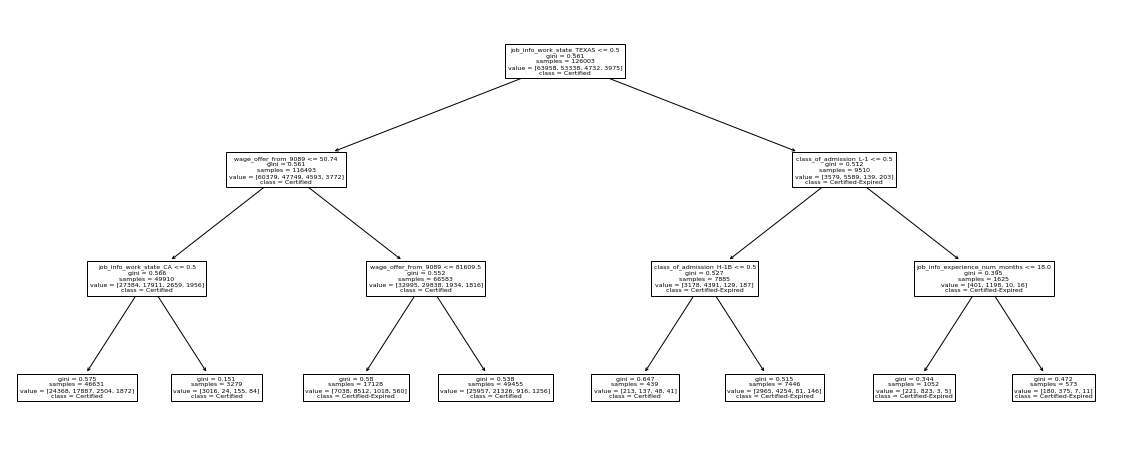

In [202]:
plt.figure(figsize = (20,8))
tree.plot_tree(clf, feature_names = X.columns, class_names = clf.classes_)

# 5.) Write your interpretation of the largest (by sample size) leaf node


The largest (by sample size) leaf node is the forth leaf node. It is classified by job_info_work_state TEXAS <= 0.5, then wage_offer_from_9089 <= 50.74, and lastly wage_offer_from_9089 > 51609.5. 

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [206]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [242]:
max_depths = range(1,50)
outputs = []

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3) #... Train test split

for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  oos_accuracy = accuracy_score(y_test, y_pred)# CALCULATE Out of sample accuracy
  outputs.append([md,oos_accuracy])

In [243]:
outputs

[[1, 0.5238750297611174],
 [2, 0.5238750297611174],
 [3, 0.5354884791407635],
 [4, 0.5369170127774398],
 [5, 0.5439009550011904],
 [6, 0.5469432025607788],
 [7, 0.5464405703552816],
 [8, 0.5560963995661491],
 [9, 0.562233803338536],
 [10, 0.5679743922118462],
 [11, 0.5714928176503267],
 [12, 0.5747466998227561],
 [13, 0.5843760747070184],
 [14, 0.5943493558371472],
 [15, 0.6000370360572471],
 [16, 0.6048252691727732],
 [17, 0.6088463268167509],
 [18, 0.6134758339726463],
 [19, 0.6161212666331578],
 [20, 0.6185550646808285],
 [21, 0.6207772281156583],
 [22, 0.6228671199174625],
 [23, 0.6250099203724769],
 [24, 0.625486098251369],
 [25, 0.6247718314330308],
 [26, 0.6254067352715537],
 [27, 0.6273908097669374],
 [28, 0.6276553530329886],
 [29, 0.6293484299357159],
 [30, 0.6307505092457871],
 [31, 0.6305917832861565],
 [32, 0.6300891510806592],
 [33, 0.6296394275283723],
 [34, 0.6308827808788128],
 [35, 0.6290574323430597],
 [36, 0.6298775164678183],
 [37, 0.6310150525118383],
 [38, 0.6312

In [225]:
max_depths = range(50,70)
outputs_2 = []
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  oos_accuracy = accuracy_score(y_test, y_pred)# CALCULATE Out of sample accuracy
  outputs_2.append([md,oos_accuracy])

In [241]:
outputs_2

[[50, 0.6339250284384012],
 [51, 0.63366048517235],
 [52, 0.6340837543980318],
 [53, 0.6331578529668527],
 [54, 0.6333165789264834],
 [55, 0.6334753048861141],
 [56, 0.6333165789264834],
 [57, 0.6335282135393243],
 [58, 0.6334488505595091],
 [59, 0.6337133938255601],
 [60, 0.633210761620063],
 [61, 0.6337927568053755],
 [62, 0.6329197640274067],
 [63, 0.6331843072934579],
 [64, 0.6331843072934579],
 [65, 0.6323642231686992],
 [66, 0.6331313986402476],
 [67, 0.6329197640274067],
 [68, 0.6326552207613555],
 [69, 0.6335017592127192]]

In [247]:
outputs_res = pd.concat([pd.DataFrame(outputs), pd.DataFrame(outputs_2)])
outputs_res

,0,1
0,1,0.523875
1,2,0.523875
2,3,0.535488
3,4,0.536917
4,5,0.543901
...,...,...
15,65,0.632364
16,66,0.633131
17,67,0.632920
18,68,0.632655


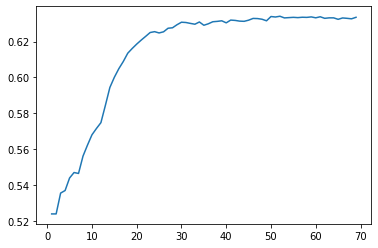

In [248]:
plt.plot(outputs_res.iloc[:,0],outputs_res.iloc[:,1])

In [252]:
outputs_res[outputs_res[1] == outputs_res[1].max()]

,0,1
2,52,0.634084


So the best max_depth for out-of sample accuracy is 52 and it will predict the test set with highest accuracy score 0.634084.